# Analysis and Performance evaluation of Terapixel rendering in (Super)Cloud Computing Data

## 1.Introduction

*The purpose of this study is to analyze the IoT environmental data collected by Newcastle Urban Observatory for the city of Newcastle Upon Tyne. The main objective is to evaluate and explore performance timings of render application and GPU card and in each task, the details of which part of the image was being rendered. Terapixel images are rendered using a scalable cloud-based visualization architecture. The Terapixel image, once created, allows for interactive exploration of the city and its data at a wide range of sensing scales ranging from the entire city to a separate desk in a room, and is accessible via a broad range of thin client devices. CRISP-DM (Cross- Industry Standard Process for Data Mining) model will be used in this data analysis. This project will be entirely dedicated to the EDA (Exploratory Data Analysis) process.*

## 2. Data Exploration Planning and Analysis Requirement:

Tera scope terapixel data is subjected to preliminary analysis to better understand the data and provide information to business stakeholders. Based on the data set, this analysis of GPU cards and XY coordinates will aid in rendering Terapixel images in an efficient and effective manner.

### 2.1 Data Exploration Planning:

* Assessing the event types that dominate task runtimes.
* Examining the correlation between GPU temperature and performance.
* Analyzing the connection between increased power draw and render time.
* Identifying GPU cards (based on their serial numbers) whose performance differs to other cards.  
* Exploring the effectiveness of the task scheduling process.

### 2.2 Analysis Plan and Requirement:

The analysis strategy for this report is to investigate the three data sets generated while different virtual machines render 3D images on 1024 GPU nodes during a run. This run is divided into three jobs to render the data visualization output, which show performance timing of the render application, performance of the GPU card, and details of which part of the image was rendered in each task. The requisite is to understand the data, then clean and preprocess the data before performing exploratory data analysis. This analysis will aid in the betterment of the rendering process.

In [1]:
# Installing pandasql

!pip install pandasql

In [2]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
from pandasql import sqldf
from datetime import datetime
from pandas import Series
sqlfn = lambda q: sqldf(q, globals())

## 3. Data Understanding:

This analysis utilizes data from a dataset generated during a run with 1024 nodes. This analysis will be performed using three csv files application-checkpoints.csv, gpu.csv, task-x-y.csv. Below all the three csv files are read:

In [3]:
# Reading all the three CSV files

appcheckpoint=pd.read_csv("application-checkpoints.csv")
gpu=pd.read_csv("gpu.csv")
xy=pd.read_csv("task-x-y.csv")

Table **application-checkpoints.csv**:

In [4]:
# Displaying first three rows of appcheckpoint table

appcheckpoint.head(3)

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [5]:
# Displaying data types of columns in appcheckpoint table

appcheckpoint.dtypes

timestamp    object
hostname     object
eventName    object
eventType    object
jobId        object
taskId       object
dtype: object

Table **gpu.csv**

In [6]:
# Displaying first three rows of GPU table

gpu.head(3)

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44


In [7]:
# Displaying data types of columns in gpu table

gpu.dtypes

timestamp          object
hostname           object
gpuSerial           int64
gpuUUID            object
powerDrawWatt     float64
gpuTempC            int64
gpuUtilPerc         int64
gpuMemUtilPerc      int64
dtype: object

Table **task-x-y.csv**

In [8]:
# Displaying first three rows of task-x-y table

xy.head(3)

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12


In [9]:
# Displaying data types of columns in xy table

xy.dtypes

taskId    object
jobId     object
x          int64
y          int64
level      int64
dtype: object

In [10]:
# Displaying the number of rows and columns in all the three tables
print("Number of rows and columns in appcheckpoint table : ",appcheckpoint.shape)
print("Number of rows and columns in gpu table : ",gpu.shape)
print("Number of rows and columns in xy table : ",xy.shape)

Number of rows and columns in appcheckpoint table :  (660400, 6)
Number of rows and columns in gpu table :  (1543681, 8)
Number of rows and columns in xy table :  (65793, 5)


## 4. Data Preparation:

After Data Understanding, the data is cleaned and preprocessed in preparation for further data analysis. There are some redundant (duplicate) data values in this data set that must be cleaned before further processing.

Count of all the duplicates rows in all the three tables are displayed

In [11]:
# Count of duplicate records in appcheckpoint table

appcheckpoint.duplicated().sum()

2470

In [12]:
# Count of duplicate records in gpu table

gpu.duplicated().sum()

9

In [13]:
# Count of duplicate records in xy table

xy.duplicated().sum()

0

Duplicate records from appcheckpoint table is dropped

In [14]:
# Removing duplicate records from appcheckpoint table

appcheck = appcheckpoint.drop_duplicates()
appcheck

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
...,...,...,...,...,...,...
660395,2018-11-08T08:30:10.296Z,0745914f4de046078517041d70b22fe700000I,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd
660396,2018-11-08T08:30:10.325Z,0745914f4de046078517041d70b22fe700000I,Uploading,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd
660397,2018-11-08T08:30:14.081Z,a77ef58b13ad4c01b769dac8409af3f800000H,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099
660398,2018-11-08T08:30:14.127Z,a77ef58b13ad4c01b769dac8409af3f800000H,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099


Duplicate records from gpu table is dropped

In [16]:
# Removing duplicate records from gpu table

gpufinal = gpu.drop_duplicates()
gpufinal

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47
...,...,...,...,...,...,...,...,...
1543676,2018-11-08T08:31:18.873Z,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.99,30,0,0
1543677,2018-11-08T08:31:24.933Z,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.90,29,0,0
1543678,2018-11-08T08:31:32.998Z,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.88,29,0,0
1543679,2018-11-08T08:31:39.057Z,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.89,29,0,0


Duplicate records from xy table is dropped

In [17]:
# Removing duplicate records from xy table

xyfinal = xy.drop_duplicates()
xyfinal

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12
...,...,...,...,...,...
65788,fce56316-25a6-44b8-b0cc-d135bc84deea,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,15,2,8
65789,feb48593-c70e-49b0-b19c-a4e2a5d2d760,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,5,14,8
65790,feb580b7-e879-40f2-aa57-28f3872af561,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,3,6,8
65791,ff1758b0-0a39-4f72-be8e-8ead79d691a6,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,1,2,8


In [15]:
# Change the datatype of a column
appcheck["timestamp"] = appcheck["timestamp"].apply(lambda x: pd.Timestamp(x))

# Display the datatype of each column
appcheck.dtypes

timestamp    datetime64[ns, UTC]
hostname                  object
eventName                 object
eventType                 object
jobId                     object
taskId                    object
dtype: object

In [18]:
# Change the datatype
gpufinal["timestamp"] = gpufinal["timestamp"].apply(lambda x: pd.Timestamp(x))
# Change the datatype
gpufinal["gpuSerial"] = gpufinal["gpuSerial"].apply(lambda x: str(x))

# Display the datatype of each column
gpufinal.dtypes

timestamp         datetime64[ns, UTC]
hostname                       object
gpuSerial                      object
gpuUUID                        object
powerDrawWatt                 float64
gpuTempC                        int64
gpuUtilPerc                     int64
gpuMemUtilPerc                  int64
dtype: object

In [77]:
# Create a new dataframe by filtering
appcheck_start = appcheck.loc[appcheck["eventType"] == "START"]

# Create a new dataframe by filtering
appcheck_stop = appcheck.loc[appcheck["eventType"] == "STOP"]

# Merge(Join) dataframes on multiple columns
appcheck_start_stop = pd.merge(appcheck_start, appcheck_stop,  how='left', on=['hostname','eventName','jobId','taskId'],
                         suffixes=('_Start_Time', '_Stop_Time'))

# # Display the first 3 rows
appcheck_start_stop.tail(4)

,timestamp_Start_Time,hostname,eventName,eventType_Start_Time,jobId,taskId,timestamp_Stop_Time,eventType_Stop_Time
328961,2018-11-08 08:30:11.174000+00:00,b9a1fa7ae2f74eb68f25f607980f97d7000005,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,120e5f6f-67a7-4973-b431-026f1a68400c,2018-11-08 08:30:12.074000+00:00,STOP
328962,2018-11-08 08:30:08.759000+00:00,6139a35676de44d6b61ec247f0ed865700001D,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,30caa975-249a-445d-a6c0-61fa38d4c4bf,2018-11-08 08:30:09.730000+00:00,STOP
328963,2018-11-08 08:30:09.642000+00:00,0d56a730076643d585f77e00d2d8521a00000D,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,423b8511-cb2e-4aa4-bb5c-85ca4a2b7ac6,2018-11-08 08:30:10.614000+00:00,STOP
328964,2018-11-08 08:30:09.649000+00:00,0d56a730076643d585f77e00d2d8521a00000D,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,423b8511-cb2e-4aa4-bb5c-85ca4a2b7ac6,2018-11-08 08:30:10.548000+00:00,STOP


In [20]:
# Create a new column from other two columns 
appcheck_start_stop["Event_RenderTime"] = (appcheck_start_stop["timestamp_Stop_Time"] - appcheck_start_stop["timestamp_Start_Time"]).dt.total_seconds()

# Display datatype of each column
appcheck_start_stop.dtypes

timestamp_Start_Time    datetime64[ns, UTC]
hostname                             object
eventName                            object
eventType_Start_Time                 object
jobId                                object
taskId                               object
timestamp_Stop_Time     datetime64[ns, UTC]
eventType_Stop_Time                  object
Event_RenderTime                    float64
dtype: object

In [21]:
# Display first 2 rows
appcheck_start_stop.tail(3)

,timestamp_Start_Time,hostname,eventName,eventType_Start_Time,jobId,taskId,timestamp_Stop_Time,eventType_Stop_Time,Event_RenderTime
328962,2018-11-08 08:30:08.759000+00:00,6139a35676de44d6b61ec247f0ed865700001D,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,30caa975-249a-445d-a6c0-61fa38d4c4bf,2018-11-08 08:30:09.730000+00:00,STOP,0.971
328963,2018-11-08 08:30:09.642000+00:00,0d56a730076643d585f77e00d2d8521a00000D,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,423b8511-cb2e-4aa4-bb5c-85ca4a2b7ac6,2018-11-08 08:30:10.614000+00:00,STOP,0.972
328964,2018-11-08 08:30:09.649000+00:00,0d56a730076643d585f77e00d2d8521a00000D,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,423b8511-cb2e-4aa4-bb5c-85ca4a2b7ac6,2018-11-08 08:30:10.548000+00:00,STOP,0.899


In [22]:
# Change the datatype 
appcheck_start_stop["Event_RenderTime"] = appcheck_start_stop["Event_RenderTime"].astype(str)

# Change the datatype
appcheck_start_stop["Event_RenderTime"] = appcheck_start_stop["Event_RenderTime"].astype('float32')

# Display first 2 rows
appcheck_start_stop.tail(3)

,timestamp_Start_Time,hostname,eventName,eventType_Start_Time,jobId,taskId,timestamp_Stop_Time,eventType_Stop_Time,Event_RenderTime
328962,2018-11-08 08:30:08.759000+00:00,6139a35676de44d6b61ec247f0ed865700001D,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,30caa975-249a-445d-a6c0-61fa38d4c4bf,2018-11-08 08:30:09.730000+00:00,STOP,0.971
328963,2018-11-08 08:30:09.642000+00:00,0d56a730076643d585f77e00d2d8521a00000D,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,423b8511-cb2e-4aa4-bb5c-85ca4a2b7ac6,2018-11-08 08:30:10.614000+00:00,STOP,0.972
328964,2018-11-08 08:30:09.649000+00:00,0d56a730076643d585f77e00d2d8521a00000D,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,423b8511-cb2e-4aa4-bb5c-85ca4a2b7ac6,2018-11-08 08:30:10.548000+00:00,STOP,0.899


In [23]:
# Sort the dataframe based on a column
appcheck_start_stop.sort_values(by=["hostname"], inplace=True)

# Display first 5 rows
appcheck_start_stop.tail(7)

,timestamp_Start_Time,hostname,eventName,eventType_Start_Time,jobId,taskId,timestamp_Stop_Time,eventType_Stop_Time,Event_RenderTime
285814,2018-11-08 07:46:50.935000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ad543e64-be07-4294-b562-c0588639d861,2018-11-08 07:46:52.016000+00:00,STOP,1.081000
300124,2018-11-08 08:21:20.994000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ea7c0679-ff57-480f-a8b1-507c094b7c65,2018-11-08 08:21:59.023000+00:00,STOP,38.028999
218933,2018-11-08 07:43:33.460000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,de595141-d9c8-4e35-ac71-f14d1c9ebe80,2018-11-08 07:44:20.792000+00:00,STOP,47.332001
218938,2018-11-08 07:43:30.381000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,472afcae-6f17-43c1-8f1c-8df4116cfed7,2018-11-08 07:43:31.506000+00:00,STOP,1.125000
277668,2018-11-08 08:00:45.782000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,4001ba74-396f-4c68-80cb-165723760b6a,2018-11-08 08:00:46.780000+00:00,STOP,0.998000
194757,2018-11-08 08:19:59.217000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,4b2777ea-b877-498f-bace-43d867a86046,2018-11-08 08:20:33.780000+00:00,STOP,34.563000
229631,2018-11-08 08:13:37.033000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,69bfa379-618d-4d74-b9ad-ddb7d7765837,2018-11-08 08:13:38.079000+00:00,STOP,1.046000


In [25]:
# Filter the dataframe
host_PT = appcheck_start_stop.loc[appcheck_start_stop["eventName"] == "TotalRender"]

# Group the dataframe and average the other numerical columns
host_PT = host_PT.groupby(by=["hostname"], as_index=False).mean()

# Display the last 3 rows
host_PT.head(3)

,hostname,Event_RenderTime
0,04dc4e9647154250beeee51b866b0715000000,44.350327
1,04dc4e9647154250beeee51b866b0715000001,45.698051
2,04dc4e9647154250beeee51b866b0715000002,40.275421


In [26]:
# Dispaly all column names
gpufinal.columns

Index(['timestamp', 'hostname', 'gpuSerial', 'gpuUUID', 'powerDrawWatt',
       'gpuTempC', 'gpuUtilPerc', 'gpuMemUtilPerc'],
      dtype='object')

In [27]:
# Group the dataframe and average the other numerical columns
gpu_PF = gpufinal[["hostname","gpuUUID","gpuSerial","powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"]].groupby(by=["hostname","gpuUUID","gpuSerial"], as_index=False).mean()

# Display the first 3 rows
gpu_PF.tail(5)

,hostname,gpuUUID,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
1019,e7adc42d28814e518e9601ac2329c513000019,GPU-53f2e984-36f3-a70f-0944-752868d6a833,320118119210,89.386562,39.095270,64.512325,36.449034
1020,e7adc42d28814e518e9601ac2329c51300001A,GPU-05e3f5b6-553b-1a37-bf7a-271c5b999a64,325117063265,82.943504,37.712858,61.762825,30.990007
1021,e7adc42d28814e518e9601ac2329c51300001B,GPU-8646ce3a-be99-02fa-a138-dafee7ea3cf2,325017048638,88.354997,38.569046,63.919947,35.593062
1022,e7adc42d28814e518e9601ac2329c51300001C,GPU-b0b09148-0762-390d-08d6-93c1a5ccd768,325117173230,88.411319,37.205863,64.930047,36.289141
1023,e7adc42d28814e518e9601ac2329c51300001D,GPU-0cee5a9f-749e-7780-791a-ff2b29590a38,320118119027,97.399313,39.816000,64.793333,36.607333


In [28]:
# Merge (Join) two dataframes
TP = pd.merge(host_PT, gpu_PF, on="hostname")

# Display first 5 rows
TP.head(3)

,hostname,Event_RenderTime,gpuUUID,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,04dc4e9647154250beeee51b866b0715000000,44.350327,GPU-a1119ee9-9cd1-919f-a479-b902142c717d,323217056165,95.868947,43.525333,63.602667,35.876000
1,04dc4e9647154250beeee51b866b0715000001,45.698051,GPU-3dc1601f-0e52-2e31-6b8d-8537d356b84d,323617042956,91.813693,40.992000,64.630000,35.510000
2,04dc4e9647154250beeee51b866b0715000002,40.275421,GPU-e2deaca4-3041-9bbd-b6ac-6d36e09ab116,323617021222,82.537798,38.048193,61.548862,30.505355


In [29]:
appcheck_start_stop.head(3)

,timestamp_Start_Time,hostname,eventName,eventType_Start_Time,jobId,taskId,timestamp_Stop_Time,eventType_Stop_Time,Event_RenderTime
190313,2018-11-08 08:16:43.895000+00:00,04dc4e9647154250beeee51b866b0715000000,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,a164499b-4bb8-42b7-9dc0-cf049b62731e,2018-11-08 08:16:44.897000+00:00,STOP,1.002000
283469,2018-11-08 07:47:22.860000+00:00,04dc4e9647154250beeee51b866b0715000000,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ffd69831-0ba4-457b-b8a8-e37c49779d94,2018-11-08 07:47:22.863000+00:00,STOP,0.003000
283468,2018-11-08 07:47:22.863000+00:00,04dc4e9647154250beeee51b866b0715000000,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ffd69831-0ba4-457b-b8a8-e37c49779d94,2018-11-08 07:47:55.554000+00:00,STOP,32.691002


In [30]:
# Merge two dataframes on multiple columns
xyfinal1 = pd.merge(xyfinal, appcheck_start_stop.loc[appcheck_start_stop["eventName"]=="TotalRender"],
                       how="inner", on=["jobId","taskId"], suffixes=("_task","_ap"))

# Filter and create a new dataframe
xy_level8 = xyfinal1[["Event_RenderTime","x","y"]].loc[xyfinal1["level"]==8]

# Group and aggregate the dataframe
xy_level8 = xy_level8.groupby(by=["x","y"], as_index=False).mean()
xy_level8.head(5)

,x,y,Event_RenderTime
0,0,0,43.853001
1,0,1,24.809999
2,0,2,27.111000
3,0,3,35.481998
4,0,4,43.898998


In [31]:
# Create a new dataframe using specific columns from other dataframe
Level_RT = xyfinal1[["level","Event_RenderTime"]]

# Group and aggregate the dataframe
Level_RT = Level_RT.groupby(by=["level"], as_index=False).mean()

# Display the dataframe
Level_RT

,level,Event_RenderTime
0,4,52.181999
1,8,48.459820
2,12,42.581760


## Data Analysis

### 1. Which tasks dominate even run times

In [32]:
# Group the dataframe
Event_Tab = appcheck_start_stop[["eventName","Event_RenderTime"]].groupby(by="eventName", as_index=False).mean()

# Sort the dataframe
Event_Tab.sort_values(by="Event_RenderTime", ascending=False, inplace=True)

# Reset dataframe index to default
Event_Tab = Event_Tab.reset_index(drop=True)

# Display the dataframe
Event_Tab

,eventName,Event_RenderTime
0,TotalRender,42.604778
1,Render,41.208221
2,Uploading,1.393641
3,Tiling,0.973207
4,Saving Config,0.002476


In [33]:
Event_Tab = Event_Tab.sort_values(by='Event_RenderTime', ascending=True)

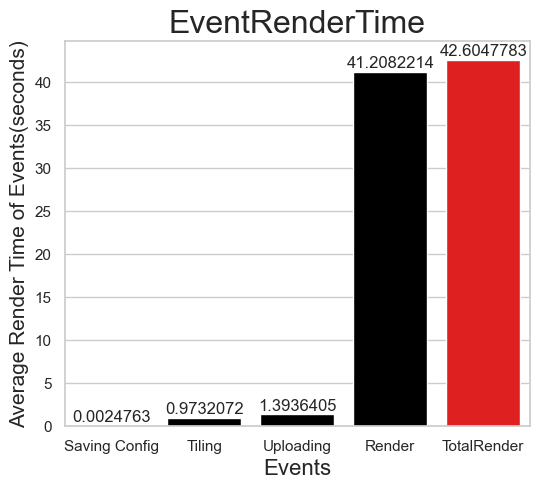

In [81]:
# Plot a barplot using seaborn library
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.0)
plt.subplots(figsize=(6,5))
palette = {i: "red" if i == "TotalRender" else 'black' for i in Event_Tab["eventName"]}
RenderTime_Plot = sns.barplot(data=Event_Tab, x="eventName", y="Event_RenderTime",palette=palette)

# Add respective value on each bar
for g in RenderTime_Plot.patches:
    RenderTime_Plot.annotate(format(g.get_height(), '.7f'),
                       (g.get_x() + g.get_width() / 2., g.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 6),
                       textcoords = 'offset points')

# Change characteristics of the visual
plt.title("EventRenderTime", size=23)
plt.xlabel("Events", size = 16)
plt.ylabel("Average Render Time of Events(seconds)", size = 15)
plt.show()

### 2. Comparisons of GPU metrics

Text(0.5, 1.0, 'GPU Measure Comparison')

<Figure size 700x600 with 0 Axes>

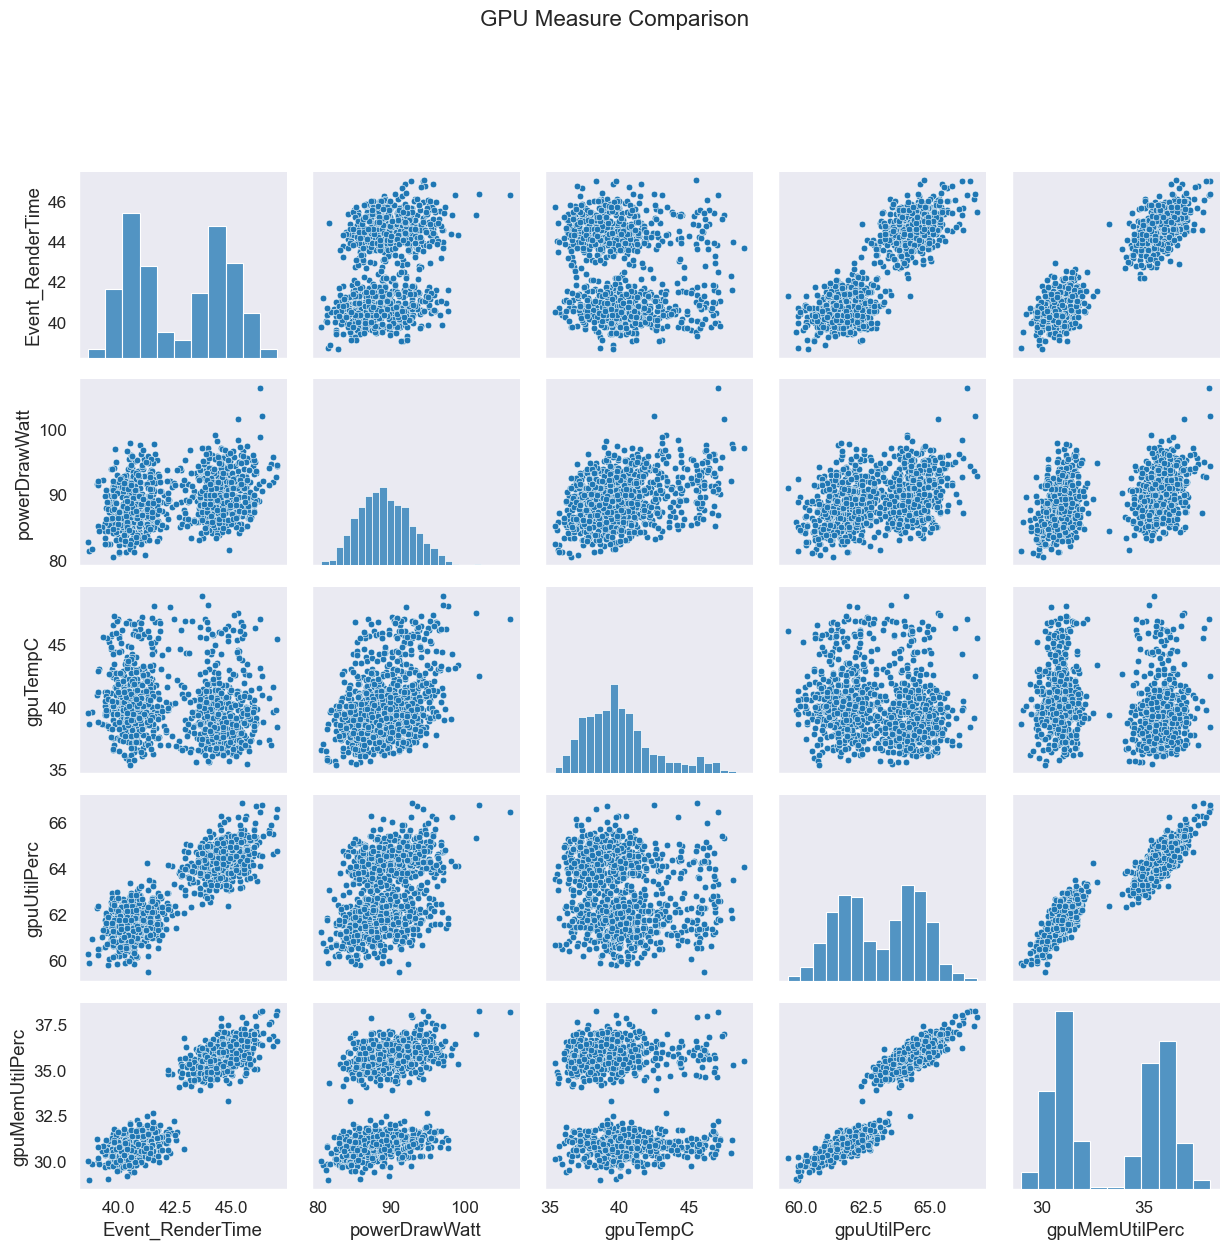

In [38]:
# Plot a Joint Plot
sns.set_style('dark')
plt.figure(figsize=(7,6))
sns.set_context('paper', font_scale=1.4)
p = sns.pairplot(data=TP)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.87)
p.fig.suptitle("GPU Measure Comparison", y=1.0)

### 3. Identification of serial numbers of GPU with least performance

In [84]:
# Worst performing GPU is calculated
Worst = """ select  gpuSerial, Event_RenderTime As "Time" from TP
 group by gpuSerial order by Time desc limit 10; """
GPU_Worst = pd.DataFrame(sqlfn(Worst)) 

In [44]:
GPU_Worst.index.name='Order'

In [45]:
GPU_Worst

,gpuSerial,Time
Order,,
0,323617042821,47.038776
1,325017018645,47.013439
2,320218055378,46.993168
3,323217048793,46.853237
4,320118118728,46.833710
5,320218055639,46.743965
6,320118119009,46.675816
7,325117172889,46.660000
8,320118118802,46.399696


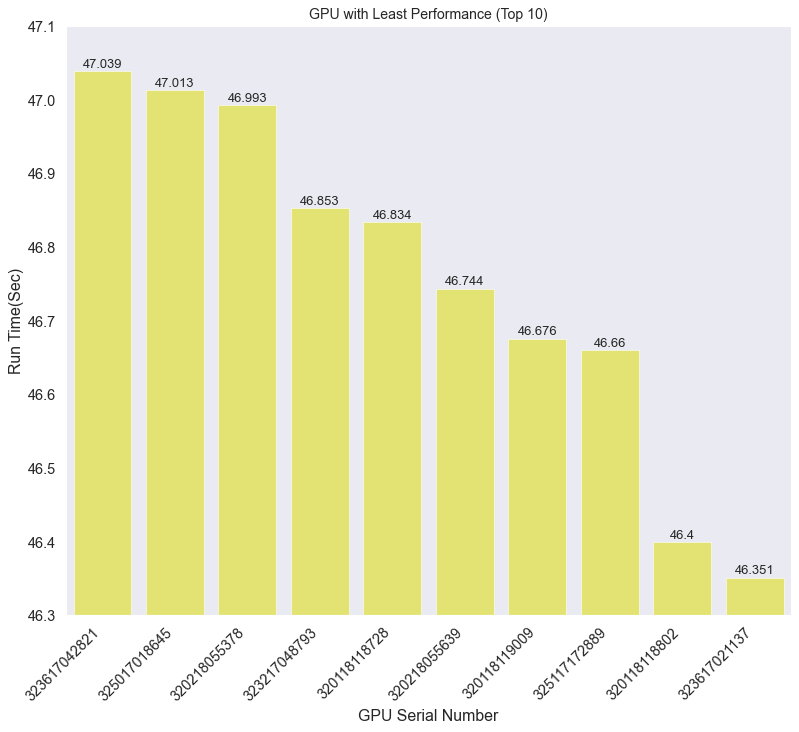

In [58]:
# Create Fig and gridspec
import matplotlib.pyplot as plt
fg = plt.figure(figsize=(11,9), dpi= 85)
pg = plt.GridSpec(5, 4, hspace=0.6, wspace=0.3)
subp = fig.add_subplot(grid[:-2, :-1])

#Plotting Bar chart for displaying the time for each event
import seaborn as sns
g = sns.barplot(data=GPU_Worst, x="gpuSerial", y="Time",order=GPU_Worst.sort_values('Time',ascending = False).gpuSerial,color='yellow',alpha=.6)
# Annotate Text
# Annotate Text
for i, cty in enumerate(GPU_Worst.Time):
    g.text(i, cty+0.005, round(cty, 3),size = 11, horizontalalignment='center')

# Title, Label, Ticks and Ylim
g.set_title('GPU with Least Performance (Top 10)', fontdict={'size':12})
g.set(ylabel='Run Time(Sec)',xlabel='GPU Serial Number',ylim=(46.3, 47.1),)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# Add patches to color the X axis labels
plt.show()

In [56]:
TP

,hostname,Event_RenderTime,gpuUUID,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,04dc4e9647154250beeee51b866b0715000000,44.350327,GPU-a1119ee9-9cd1-919f-a479-b902142c717d,323217056165,95.868947,43.525333,63.602667,35.876000
1,04dc4e9647154250beeee51b866b0715000001,45.698051,GPU-3dc1601f-0e52-2e31-6b8d-8537d356b84d,323617042956,91.813693,40.992000,64.630000,35.510000
2,04dc4e9647154250beeee51b866b0715000002,40.275421,GPU-e2deaca4-3041-9bbd-b6ac-6d36e09ab116,323617021222,82.537798,38.048193,61.548862,30.505355
3,04dc4e9647154250beeee51b866b0715000003,40.822983,GPU-173a16e7-07e7-3677-b499-9e20353f81a3,323617021168,86.558581,41.576282,60.127249,29.832778
4,04dc4e9647154250beeee51b866b0715000004,45.969166,GPU-c1bb7aec-1afc-3226-db53-58f077365bea,323217056664,94.292392,39.742838,64.545636,35.549634
...,...,...,...,...,...,...,...,...
1019,e7adc42d28814e518e9601ac2329c513000019,45.212002,GPU-53f2e984-36f3-a70f-0944-752868d6a833,320118119210,89.386562,39.095270,64.512325,36.449034
1020,e7adc42d28814e518e9601ac2329c51300001A,40.272308,GPU-05e3f5b6-553b-1a37-bf7a-271c5b999a64,325117063265,82.943504,37.712858,61.762825,30.990007
1021,e7adc42d28814e518e9601ac2329c51300001B,45.223820,GPU-8646ce3a-be99-02fa-a138-dafee7ea3cf2,325017048638,88.354997,38.569046,63.919947,35.593062
1022,e7adc42d28814e518e9601ac2329c51300001C,44.953407,GPU-b0b09148-0762-390d-08d6-93c1a5ccd768,325117173230,88.411319,37.205863,64.930047,36.289141


### 4. Interplay of temperature and power

The correlation coeeficient between temperature and power = 0.4


<Figure size 800x800 with 0 Axes>

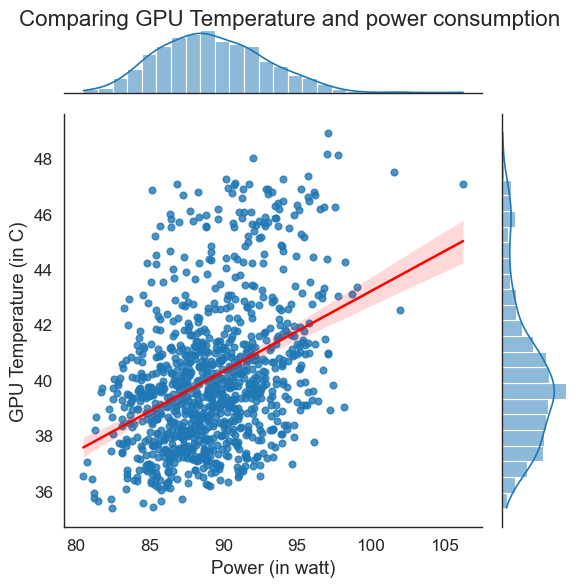

In [62]:
# Plot a Joint Plot
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.set_context('paper', font_scale=1.4)
p = sns.jointplot(x='powerDrawWatt', y='gpuTempC', data=TP, kind='reg',joint_kws={'line_kws':{'color':'red'}})
p.fig.suptitle("Comparing GPU Temperature and power consumption")
p.ax_joint.set_xlabel('Power (in watt)')
p.ax_joint.set_ylabel('GPU Temperature (in C)')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

print(f'The correlation coeeficient between temperature and power = {np.round(np.corrcoef(TP.powerDrawWatt, TP.gpuTempC)[0,1], 2)}')

### 5. variation in memory utlization percentage of the gpu with temperature

The correlation coeeficient between temperature and memory utilisation = -0.18


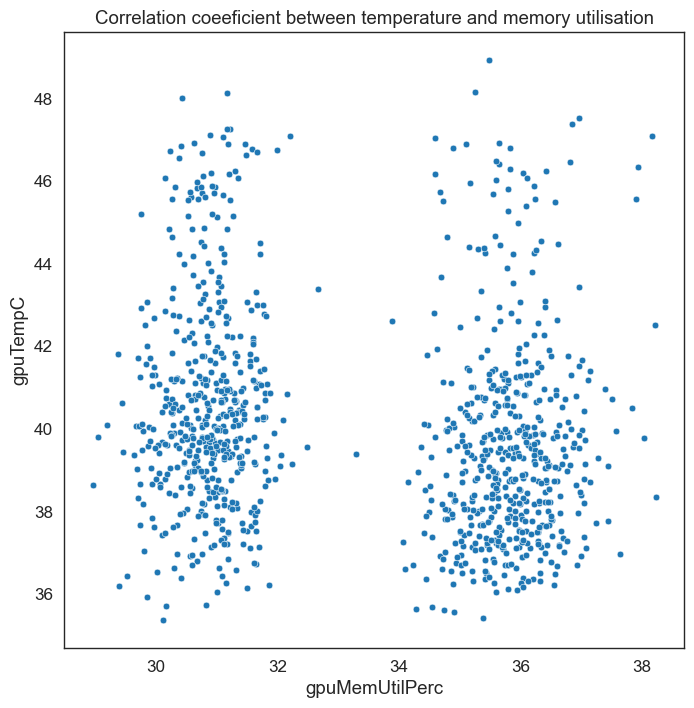

In [67]:
# Plot a Joint Plot
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.set_context('paper', font_scale=1.4)
sns.scatterplot(x='gpuMemUtilPerc', y='gpuTempC', data=TP)
plt.title('Correlation coeeficient between temperature and memory utilisation')


print(f'The correlation coeeficient between temperature and memory utilisation = {np.round(np.corrcoef(TP.gpuMemUtilPerc, TP.gpuTempC)[0,1], 2)}')

In [69]:
Level_RT

,level,Event_RenderTime
0,4,52.181999
1,8,48.459820
2,12,42.581760


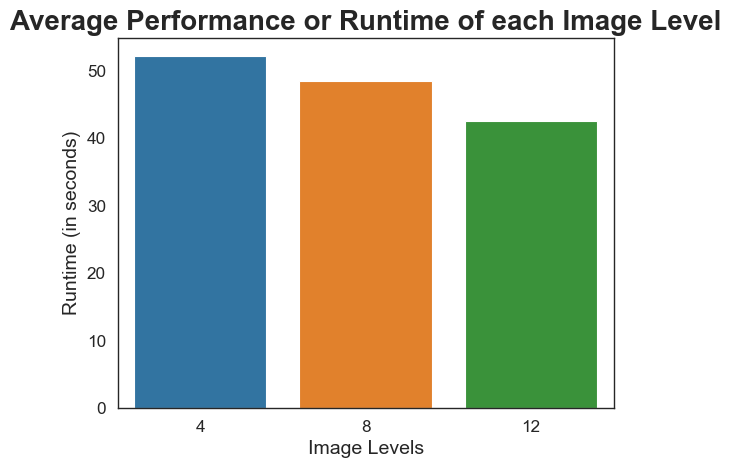

In [71]:
# Plot barplot
sns.barplot(data=Level_RT, x="level", y="Event_RenderTime")
plt.title("Average Performance or Runtime of each Image Level", size=20,fontweight='bold')
plt.xlabel("Image Levels", size = 14)
plt.ylabel("Runtime (in seconds)", size = 14)
plt.show()

In [72]:
xy_level8

,x,y,Event_RenderTime
0,0,0,43.853001
1,0,1,24.809999
2,0,2,27.111000
3,0,3,35.481998
4,0,4,43.898998
...,...,...,...
251,15,11,64.322998
252,15,12,47.679001
253,15,13,47.452000
254,15,14,43.641998


Text(0.5, 1.0, 'Heatmap based on Runtime for each co-ordinate of the Rendered Tile')

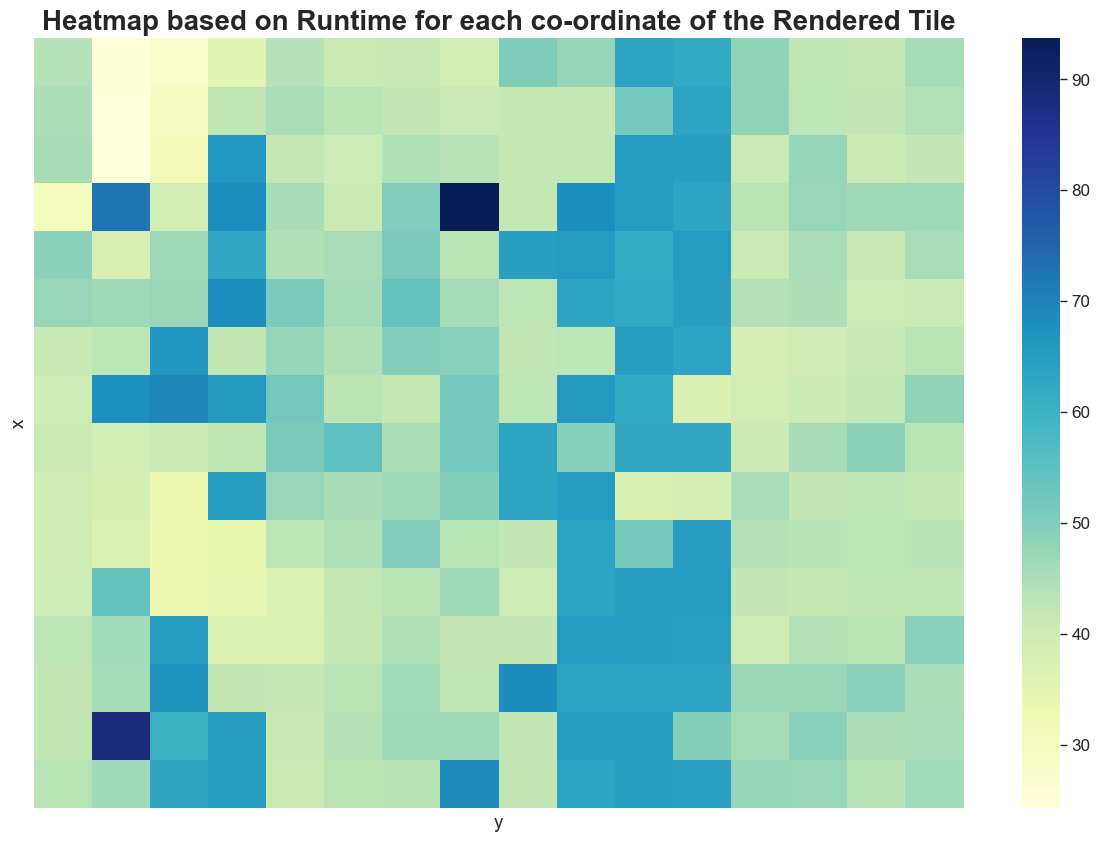

In [74]:
# Plot seaborn heatmap
sns.set(font_scale=0.8)
sns.set_context('paper', font_scale=1.4)
fig, ax = plt.subplots(figsize=(15,10))
glue = xy_level8[["x","y","Event_RenderTime"]].pivot("x", "y", "Event_RenderTime")
ax = sns.heatmap(glue, cmap='YlGnBu', annot=False, xticklabels=False, yticklabels=False)
ax.tick_params()

# Change characteristics of the visual
plt.title("Heatmap based on Runtime for each co-ordinate of the Rendered Tile", size=20,fontweight='bold' )